In [1]:
# Required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from IPython.display import display
from fitter import Fitter
from statsmodels.discrete.discrete_model import NegativeBinomial

In [2]:
# -------------------------------
# 1. Import Data
# -------------------------------
ball_data = pd.read_csv("D:/Masters/VCU/Classes/SCMA/R/A2/IPL_ball_by_ball_updated till 2024.csv", low_memory=False)
salary_data = pd.read_excel("D:/Masters/VCU/Classes/SCMA/R/A2/IPL SALARIES 2024.xlsx")

In [3]:
# Clean column names
ball_data.columns = ball_data.columns.str.strip().str.lower().str.replace(" ", "_")
salary_data.columns = salary_data.columns.str.strip().str.lower().str.replace(" ", "_")

In [4]:
# -------------------------------
# 2. Arrange round-wise data: balls, runs, wickets
# -------------------------------
ball_summary = (
    ball_data.groupby(['season', 'match_id', 'striker'])
    .agg(
        balls=('runs_scored', 'count'),
        runs=('runs_scored', 'sum'),
        wickets=('wicket_type', lambda x: x.isin([
            "caught", "bowled", "lbw", "stumped", "hit wicket", "caught and bowled"]).sum())
    )
    .reset_index()
)
print(ball_summary)

        season  match_id         striker  balls  runs  wickets
0      2007/08    335982       AA Noffke     12     9        0
1      2007/08    335982         B Akhil      2     0        1
2      2007/08    335982     BB McCullum     77   158        0
3      2007/08    335982        CL White     10     6        1
4      2007/08    335982       DJ Hussey     12    12        1
...        ...       ...             ...    ...   ...      ...
16144     2024   1426287      RR Rossouw     25    43        1
16145     2024   1426287          S Dube      2     0        1
16146     2024   1426287       SM Curran     24    26        0
16147     2024   1426287    Sameer Rizvi     23    21        1
16148     2024   1426287  Shashank Singh     27    25        0

[16149 rows x 6 columns]


In [5]:
# -------------------------------
# 3. Top 3 run-getters and wicket-takers per season
# -------------------------------
top_runs = (
    ball_summary.sort_values(['season', 'runs'], ascending=[True, False])
    .groupby('season')
    .head(3)
)

# For wickets (bowler-based)
bowler_summary = (
    ball_data.groupby(['season', 'match_id', 'bowler'])
    .agg(wickets=('wicket_type', lambda x: x.isin([
        "caught", "bowled", "lbw", "stumped", "hit wicket", "caught and bowled"]).sum()))
    .reset_index()
)

top_wickets = (
    bowler_summary.groupby(['season', 'bowler'])
    .agg(total_wickets=('wickets', 'sum'))
    .reset_index()
    .sort_values(['season', 'total_wickets'], ascending=[True, False])
    .groupby('season')
    .head(3)
)

print("Top 3 Run-Getters per Season:")
display(top_runs[['season', 'striker', 'runs']])

print("\nTop 3 Wicket-Takers per Season:")
display(top_wickets[['season', 'bowler', 'total_wickets']])

Top 3 Run-Getters per Season:


,season,striker,runs
2,2007/08,BB McCullum,158
119,2007/08,A Symonds,117
21,2007/08,MEK Hussey,116
1701,2009,MK Pandey,114
988,2009,AB de Villiers,105
1193,2009,SK Raina,98
2237,2009/10,M Vijay,127
2266,2009/10,DPMD Jayawardene,110
2145,2009/10,DA Warner,107
2788,2011,PC Valthaty,120



Top 3 Wicket-Takers per Season:


,season,bowler,total_wickets
84,2007/08,Sohail Tanvir,22
68,2007/08,S Sreesanth,19
77,2007/08,SK Warne,19
174,2009,RP Singh,23
99,2009,A Kumble,21
102,2009,A Nehra,19
284,2009/10,PP Ojha,21
210,2009/10,A Kumble,17
211,2009/10,A Mishra,17
447,2011,SL Malinga,28


Best-Fit Distribution for Runs Scored by Top 3 Batsmen:
{'weibull_min': {'c': 0.8643246403969014, 'loc': -2.4548389663735745e-26, 'scale': 42.559279131540364}}


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
weibull_min,0.010139,1068.138759,1076.550822,inf,0.092375,2.340281e-01
gamma,0.010245,1097.462796,1105.874860,inf,0.154759,5.116490e-03
norm,0.013689,1074.313828,1079.921870,inf,0.118895,5.841432e-02
lognorm,0.019717,2036.254369,2044.666432,inf,0.529250,2.101673e-32


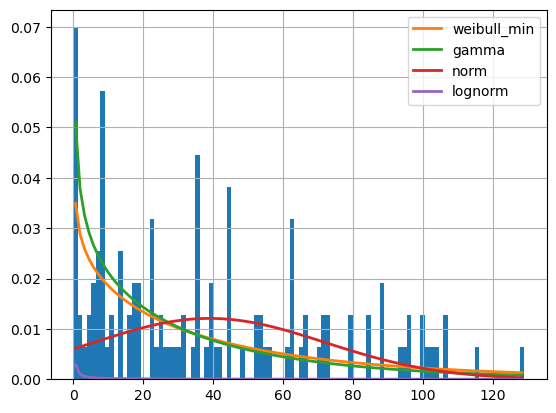

In [7]:
# -------------------------------
# 4. Fit distribution for the top Batsman in the last 3 seasons
# -------------------------------
# Top 3 batsmen by total runs, Filter the last 3 IPL seasons
ball_summary['season'] = ball_summary['season'].astype(str)
latest_seasons = sorted(ball_summary['season'].unique())[-3:]

top_batsmen = (
    ball_summary[ball_summary['season'].isin(latest_seasons)]
    .groupby('striker')
    .agg(total_runs=('runs', 'sum'))
    .reset_index()
    .sort_values('total_runs', ascending=False)
    .head(3)['striker']
    .tolist()
)

matchwise_runs = ball_summary[
    (ball_summary['season'].isin(latest_seasons)) &
    (ball_summary['striker'].isin(top_batsmen))
]['runs']

# Fit candidate distributions
f_runs = Fitter(matchwise_runs, distributions=['lognorm', 'gamma', 'weibull_min', 'norm'])
f_runs.fit()

# Print best fit
print("Best-Fit Distribution for Runs Scored by Top 3 Batsmen:")
print(f_runs.get_best())

# Plot distribution fits
f_runs.summary()

In [8]:
# -------------------------------
# 5. Fit distribution for the top Bowler in the last 3 seasons
# -------------------------------

top_bowlers = (
    ball_data[ball_data['season'].astype(str).isin(latest_seasons)]
    .groupby('bowler')
    .agg(total_wickets=('wicket_type', lambda x: x.isin([
        "caught", "bowled", "lbw", "stumped", "hit wicket", "caught and bowled"
    ]).sum()))
    .reset_index()
    .sort_values('total_wickets', ascending=False)
    .head(3)['bowler']
    .tolist()
)

# Match-wise WICKETS data for the top 3 bowlers
bowler_matchwise = (
    ball_data[
        (ball_data['season'].astype(str).isin(latest_seasons)) &
        (ball_data['bowler'].isin(top_bowlers))
    ]
    .groupby(['season', 'match_id', 'bowler'])
    .agg(wickets=('wicket_type', lambda x: x.isin([
        "caught", "bowled", "lbw", "stumped", "hit wicket", "caught and bowled"
    ]).sum()))
    .reset_index()
)

matchwise_wickets = bowler_matchwise['wickets'].values

# Fit the Negative Binomial distribution
X = np.ones(len(matchwise_wickets))  # Intercept-only model
model = NegativeBinomial(matchwise_wickets, X)
results = model.fit()

# Extract parameters
mu = results.predict().mean()
alpha = results.params[-1]
size = 1 / alpha
prob = size / (size + mu)

# Display
print("Best-Fit Negative Binomial Distribution (Wickets by Top 3 Bowlers):")
print(f"  size (n): {size:.2f}")
print(f"  prob (p): {prob:.4f}")

Optimization terminated successfully.
         Current function value: 1.513458
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Best-Fit Negative Binomial Distribution (Wickets by Top 3 Bowlers):
  size (n): 31.13
  prob (p): 0.9568


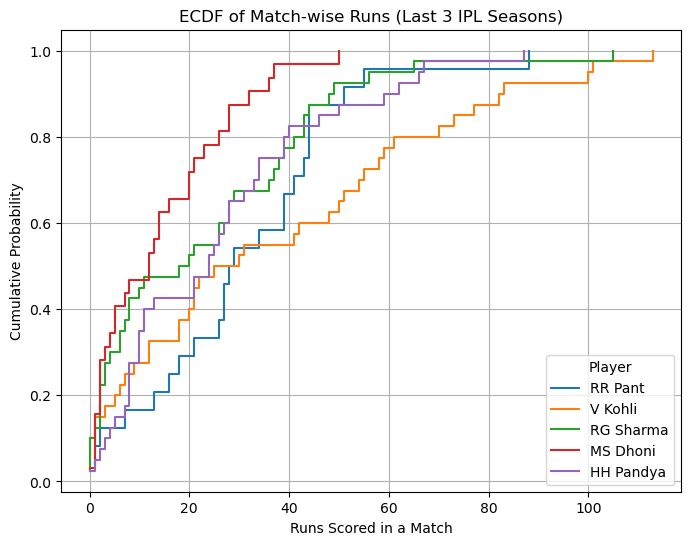

In [9]:
# -------------------------------
# 6. ECDF Comparison of Players
# -------------------------------

# Ensure 'season' is numeric
ball_data['season'] = pd.to_numeric(ball_data['season'], errors='coerce')

# Get the latest 3 seasons
latest_seasons = sorted(ball_data['season'].dropna().unique())[-3:]

# Players of interest
selected_players = ["RR Pant", "V Kohli", "RG Sharma", "MS Dhoni", "HH Pandya"]

# Rebuild summary table
ball_summary = (
    ball_data
    .groupby(['season', 'match_id', 'striker'], as_index=False)
    .agg(runs=('runs_scored', 'sum'))
)

# Filter relevant data
ecdf_data = ball_summary[
    (ball_summary['season'].isin(latest_seasons)) &
    (ball_summary['striker'].isin(selected_players))
]

# Check if data exists
if ecdf_data.empty:
    print("⚠️ ECDF data is empty. Check player names and data filters.")
else:
    # ECDF function
    def ecdf(series):
        x = np.sort(series)
        y = np.arange(1, len(x)+1) / len(x)
        return x, y

    # Plot ECDF
    plt.figure(figsize=(8, 6))
    for player in selected_players:
        player_data = ecdf_data[ecdf_data['striker'] == player]['runs']
        if not player_data.empty:
            x, y = ecdf(player_data)
            plt.step(x, y, where='post', label=player)

    plt.title("ECDF of Match-wise Runs (Last 3 IPL Seasons)")
    plt.xlabel("Runs Scored in a Match")
    plt.ylabel("Cumulative Probability")
    plt.legend(title="Player", loc='lower right')
    plt.grid(True)
    plt.show()


In [10]:
# -------------------------------
# 7. Best Fit distribution for RR Pant using statsmodels
# -------------------------------
from statsmodels.discrete.discrete_model import NegativeBinomial
rr_pant = ball_summary[(ball_summary['striker'] == "RR Pant") & (ball_summary['season'].isin(latest_seasons))]

y = rr_pant['runs'].values
X = np.ones(len(y))  # Constant-only model

# Fit Negative Binomial with estimated alpha
model = NegativeBinomial(y, X)
results = model.fit()

# Extract estimated mean and dispersion
mu = results.predict().mean()
alpha = results.params[-1]  # dispersion is last param
size = 1 / alpha
prob = size / (size + mu)

print(f"Estimated NB Parameters for RR Pant:\n  size (n): {size:.2f}\n  prob (p): {prob:.4f}")

Optimization terminated successfully.
         Current function value: 4.389403
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Estimated NB Parameters for RR Pant:
  size (n): 1.65
  prob (p): 0.0508


In [11]:
# ---------------------------------------------
# 8. Relationship between players’ performance and salary (Correlation)
# --------------------------------------------

# Clean column names
ball_data.columns = ball_data.columns.str.lower().str.strip().str.replace(" ", "_")
salary_data.columns = salary_data.columns.str.lower().str.strip().str.replace(" ", "_")

# A. Convert season column to int for consistency
ball_data['season'] = pd.to_numeric(ball_data['season'], errors='coerce')

# B. Get the most recent season
latest_season = int(ball_data['season'].max())

# C. Filter for the latest season only
latest_season_data = ball_data[ball_data['season'] == latest_season]

# D. Summarise runs, balls faced, and dismissals
ball_summary = (
    latest_season_data
    .groupby(['season', 'match_id', 'striker'], as_index=False)
    .agg(
        balls=('ball_no', 'count'),  
        runs=('runs_scored', 'sum'),
        wickets=('wicket_type', lambda x: x.isin([
            "caught", "bowled", "lbw", "stumped", "hit wicket", "caught and bowled"]).sum())
    )
)

# E. Compute average match-wise performance per player
player_avg_perf = (
    ball_summary
    .groupby('striker', as_index=False)
    .agg(
        avg_runs=('runs', 'mean'),
        avg_wickets=('wickets', 'mean')
    )
)

# F. Clean and merge with salary data
salary_data['salary_numeric'] = (
    salary_data['rs'].astype(str).str.replace(",", "", regex=False).astype(float)
)

merged = pd.merge(player_avg_perf, salary_data, left_on='striker', right_on='player')
merged = merged.dropna(subset=['salary_numeric'])

# G. Correlation for latest season only
cor_avg_runs = merged['avg_runs'].corr(merged['salary_numeric'])
cor_avg_wickets = merged['avg_wickets'].corr(merged['salary_numeric'])

print(f"Correlation between average runs (latest season) and salary: {cor_avg_runs:.3f}")
print(f"Correlation between average wickets (latest season) and salary: {cor_avg_wickets:.3f}")

Correlation between average runs (latest season) and salary: 0.409
Correlation between average wickets (latest season) and salary: 0.148


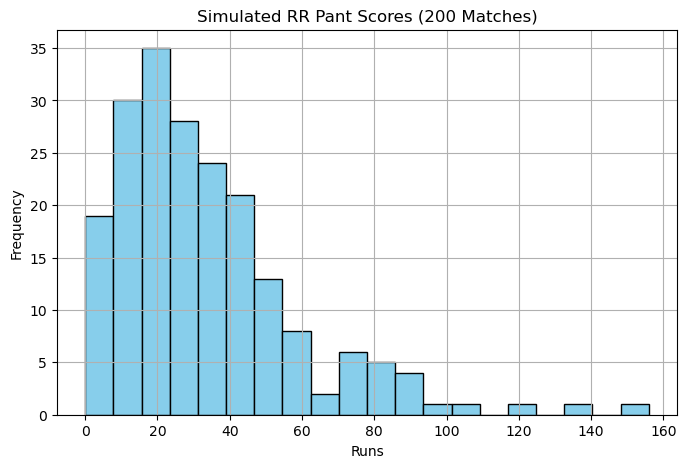


--- RR Pant Simulated Performance ---
Median score: 28.5
P(score ≥ 30): 45.00%
P(score ≥ 50): 19.50%
P(score ≥ 100): 2.00%

Quantiles:
25th percentile: 16.0
75th percentile: 42.5
95th percentile: 82.0
99th percentile: 118.2199999999998


In [12]:
# -------------------------------
# 9. Simulate RR Pant’s 200 innings using estimated NB parameters
# -------------------------------
if not rr_pant.empty:
    np.random.seed(42)
    sim_runs = np.random.negative_binomial(size, prob, size=200)

    # Histogram
    plt.figure(figsize=(8, 5))
    plt.hist(sim_runs, bins=20, color='skyblue', edgecolor='black')
    plt.title("Simulated RR Pant Scores (200 Matches)")
    plt.xlabel("Runs")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    # Probabilities and quantiles
    print("\n--- RR Pant Simulated Performance ---")
    print(f"Median score: {np.median(sim_runs)}")
    print(f"P(score ≥ 30): {np.mean(sim_runs >= 30):.2%}")
    print(f"P(score ≥ 50): {np.mean(sim_runs >= 50):.2%}")
    print(f"P(score ≥ 100): {np.mean(sim_runs >= 100):.2%}")
    print("\nQuantiles:")
    print(f"25th percentile: {np.percentile(sim_runs, 25)}")
    print(f"75th percentile: {np.percentile(sim_runs, 75)}")
    print(f"95th percentile: {np.percentile(sim_runs, 95)}")
    print(f"99th percentile: {np.percentile(sim_runs, 99)}")